 DAEDALUS – Distributed and Automated Evolutionary Deep Architecture Learning with Unprecedented Scalability

This research code was developed as part of the research programme Open Technology Programme with project number 18373, which was financed by the Dutch Research Council (NWO), Elekta, and Ortec Logiqcare.

Project leaders: Peter A.N. Bosman, Tanja Alderliesten
Researchers: Alex Chebykin, Arthur Guijt, Vangelis Kostoulas
Main code developer: Arthur Guijt

This notebook processes the data involved with the multi-objective experiments.
It requires a working installation of Python with pandas, and RPy2; alongside R with ggplot.

# Specification
These are basically the parameters that differ from problem to problem for the data processing,
placed on top for easy access. Ensure that the filenames below are correct!

In [1]:
problem_name = "maxcut_vs_maxcut"
path_data_hypervolume = "paper_multiobjective_9c2eeca_maxcut_vs_maxcut_hv.csv.gz"
path_data_archives = "2021-12-20-paper_multiobjective_9c2eeca_archives.zip"
path_data_references = "reference_fronts.zip"
columns_configuration = ["approach", "l"]
columns_run = columns_configuration + ["run"]

approach_relabeling = {
    "0--c0": "Objective / Domination",
    "0_-1--c8--x-1": "Asymmetric Kernel / Domination",
    "0_-1--c9--x-1": "Symmetric Kernel / Domination",
    "-3_-1--c0": "Objective / Scalarized",
    "-3_-1--c8--x-1": "Asymmetric Kernel / Scalarized",
    "-3_-1--c9--x-1": "Symmetric Kernel / Scalarized",
}

preferred_ordering = [
    "Objective / Domination",
    "Objective / Scalarized",
    "Asymmetric Kernel / Domination",
    "Asymmetric Kernel / Scalarized",
    "Symmetric Kernel / Domination",
    "Symmetric Kernel / Scalarized",
]
preferred_ordering_front = preferred_ordering + ["Reference"]

def run_to_elitist_archive(df):
    return "paper_multiobjective_9c2eeca_maxcut_vs_maxcut/approach_" + df["approach spec"].map(str) + "__run_" + df["run"].map(str) + "__l_" + df["l"].map(str) + "/elitist_archive.dat"

def run_to_reference_front(df):
    return "maxcut_maxcut/maxcut_pareto_front_" + df["l"].map(str) + ".txt"

# Imports

In [2]:
import pandas as pd
import numpy as np
import zipfile

%load_ext rpy2.ipython
%Rdevice svg

C:\Program Files\Python310\lib\site-packages\rpy2\robjects\packages.py:366: UserWarning: The symbol 'quartz' is not in this R namespace/package.
  warnings.warn(


In [3]:
%%R
library(ggplot2)
library(scales)

# tables & data processing in R
library(gt)
library(xtable)
library(dplyr)
library(tidyr)

R[write to console]: 
Attaching package: 'dplyr'


R[write to console]: The following objects are masked from 'package:stats':

    filter, lag


R[write to console]: The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




# Loading Data

In [4]:
# Load hypervolume data
data_hypervolume = pd.read_csv(path_data_hypervolume)
data_hypervolume["approach spec"] = data_hypervolume["approach"]
data_hypervolume["approach"] = data_hypervolume["approach"].replace(approach_relabeling)
data_hypervolume

,#evaluations,time (ms),hypervolume,approach,run,l,approach spec
0,6560,21,1.000000,Asymmetric Kernel / Domination,14,12,0_-1--c8--x-1
1,7907,129,0.466428,Asymmetric Kernel / Domination,25,50,0_-1--c8--x-1
2,18542,291,0.744239,Asymmetric Kernel / Domination,25,50,0_-1--c8--x-1
3,21186,308,0.757542,Asymmetric Kernel / Domination,25,50,0_-1--c8--x-1
4,39845,539,0.864686,Asymmetric Kernel / Domination,25,50,0_-1--c8--x-1
...,...,...,...,...,...,...,...
46109,9906,199,0.921714,Symmetric Kernel / Scalarized,13,25,-3_-1--c9--x-1
46110,18918,249,0.990837,Symmetric Kernel / Scalarized,13,25,-3_-1--c9--x-1
46111,25947,399,0.997079,Symmetric Kernel / Scalarized,13,25,-3_-1--c9--x-1
46112,34771,456,0.999026,Symmetric Kernel / Scalarized,13,25,-3_-1--c9--x-1


In [5]:
# Determine which run is the median run for a configuration as representative of the final front.
# 1: determine the final hypervolume as we'll be plotting the final archive.
data_last_hypervolume = data_hypervolume.sort_values("#evaluations").groupby(columns_run).last().reset_index()
# 2: From this determine median hypervolume
data_last_hypervolume = data_last_hypervolume.merge(data_last_hypervolume.groupby(columns_configuration)["hypervolume"].median().rename("median hypervolume").reset_index())
data_last_hypervolume["d hv mhv"] = (data_last_hypervolume["hypervolume"] - data_last_hypervolume["median hypervolume"]).abs()
# 3: Find the nearest sample
data_last_hypervolume = data_last_hypervolume.groupby(columns_configuration).apply(lambda df: df.iloc[df["d hv mhv"].argmin()]).reset_index(drop=True)
data_last_hypervolume["archive path"] = run_to_elitist_archive(data_last_hypervolume)
data_last_hypervolume["reference path"] = run_to_reference_front(data_last_hypervolume)
data_last_hypervolume

,approach,l,run,#evaluations,time (ms),hypervolume,approach spec,median hypervolume,d hv mhv,archive path,reference path
0,Asymmetric Kernel / Domination,12,0,2174,7,1.000000,0_-1--c8--x-1,1.000000,0.000000,paper_multiobjective_9c2eeca_maxcut_vs_maxcut/...,maxcut_maxcut/maxcut_pareto_front_12.txt
1,Asymmetric Kernel / Domination,25,0,126227,882,1.000000,0_-1--c8--x-1,1.000000,0.000000,paper_multiobjective_9c2eeca_maxcut_vs_maxcut/...,maxcut_maxcut/maxcut_pareto_front_25.txt
2,Asymmetric Kernel / Domination,50,0,10782356,315795,1.000000,0_-1--c8--x-1,1.000000,0.000000,paper_multiobjective_9c2eeca_maxcut_vs_maxcut/...,maxcut_maxcut/maxcut_pareto_front_50.txt
3,Asymmetric Kernel / Domination,100,10,94799060,10331725,0.998945,0_-1--c8--x-1,0.999002,0.000057,paper_multiobjective_9c2eeca_maxcut_vs_maxcut/...,maxcut_maxcut/maxcut_pareto_front_100.txt
4,Asymmetric Kernel / Scalarized,12,0,1847,89,1.000000,-3_-1--c8--x-1,1.000000,0.000000,paper_multiobjective_9c2eeca_maxcut_vs_maxcut/...,maxcut_maxcut/maxcut_pareto_front_12.txt
5,Asymmetric Kernel / Scalarized,25,0,41065,492,1.000000,-3_-1--c8--x-1,1.000000,0.000000,paper_multiobjective_9c2eeca_maxcut_vs_maxcut/...,maxcut_maxcut/maxcut_pareto_front_25.txt
6,Asymmetric Kernel / Scalarized,50,0,11542916,432707,1.000000,-3_-1--c8--x-1,1.000000,0.000000,paper_multiobjective_9c2eeca_maxcut_vs_maxcut/...,maxcut_maxcut/maxcut_pareto_front_50.txt
7,Asymmetric Kernel / Scalarized,100,2,93980766,11336919,0.999795,-3_-1--c8--x-1,0.999795,0.000000,paper_multiobjective_9c2eeca_maxcut_vs_maxcut/...,maxcut_maxcut/maxcut_pareto_front_100.txt
8,Objective / Domination,12,0,9276,16,1.000000,0--c0,1.000000,0.000000,paper_multiobjective_9c2eeca_maxcut_vs_maxcut/...,maxcut_maxcut/maxcut_pareto_front_12.txt
9,Objective / Domination,25,0,41545,110,1.000000,0--c0,1.000000,0.000000,paper_multiobjective_9c2eeca_maxcut_vs_maxcut/...,maxcut_maxcut/maxcut_pareto_front_25.txt


In [6]:
# Load relevant reference fronts from zip
reference_fronts_zip = zipfile.ZipFile(path_data_references)

def load_reference_front_from_zip(path):
    with reference_fronts_zip.open(path) as f:
        df = pd.read_csv(f, sep=" ", header=None, skiprows=2)
        df["reference path"] = path
        return df

reference_fronts_df = pd.concat([
    load_reference_front_from_zip(reference_path)
    for reference_path in data_last_hypervolume["reference path"].unique()
])

# Rename to bring the definition in line with the other dataframe
reference_fronts_df = reference_fronts_df.rename(columns={0: "objective0", 1: "objective1"})

reference_fronts_df

,objective0,objective1,reference path
0,103.0,124.0,maxcut_maxcut/maxcut_pareto_front_12.txt
1,107.0,120.0,maxcut_maxcut/maxcut_pareto_front_12.txt
2,110.0,118.0,maxcut_maxcut/maxcut_pareto_front_12.txt
3,111.0,117.0,maxcut_maxcut/maxcut_pareto_front_12.txt
4,119.0,116.0,maxcut_maxcut/maxcut_pareto_front_12.txt
...,...,...,...
134,7999.0,7568.0,maxcut_maxcut/maxcut_pareto_front_100.txt
135,8000.0,7563.0,maxcut_maxcut/maxcut_pareto_front_100.txt
136,8003.0,7556.0,maxcut_maxcut/maxcut_pareto_front_100.txt
137,8005.0,7514.0,maxcut_maxcut/maxcut_pareto_front_100.txt


In [7]:
# Load archives from zip
archives_zip = zipfile.ZipFile(path_data_archives)

def load_archives_from_zip(path):
    with archives_zip.open(path) as f:
        df = pd.read_csv(f)
        df["archive path"] = path
        return df

archives_zip_df = pd.concat([
    load_archives_from_zip(archive_path)
    for archive_path in data_last_hypervolume["archive path"]
])
archives_zip_df

,objective0,objective1,constraint,solution,archive path
0,103,124,0,1110100110,paper_multiobjective_9c2eeca_maxcut_vs_maxcut/...
1,119,116,0,10111010010,paper_multiobjective_9c2eeca_maxcut_vs_maxcut/...
2,110,118,0,111000011001,paper_multiobjective_9c2eeca_maxcut_vs_maxcut/...
3,107,120,0,110010100110,paper_multiobjective_9c2eeca_maxcut_vs_maxcut/...
4,111,117,0,111000001101,paper_multiobjective_9c2eeca_maxcut_vs_maxcut/...
...,...,...,...,...,...
132,7968,7643,0,0100111011100100011110001100100101001001000111...,paper_multiobjective_9c2eeca_maxcut_vs_maxcut/...
133,7970,7639,0,0100101011100100011110001100100101001001000111...,paper_multiobjective_9c2eeca_maxcut_vs_maxcut/...
134,7675,7939,0,0110101111100110100111001000111100110111111111...,paper_multiobjective_9c2eeca_maxcut_vs_maxcut/...
135,7954,7679,0,1100000101011011001100110011101011101011101101...,paper_multiobjective_9c2eeca_maxcut_vs_maxcut/...


# Plotting: Convergence Graphs

In [8]:
# Specifications for resampling
max_evaluations = 100_000_000
sample_every = 1_000_000

# Precompute bin each sample ends up in
data_resampled_hypervolume = data_hypervolume.copy()
data_resampled_hypervolume["#evaluations bin"] = (data_resampled_hypervolume["#evaluations"] / sample_every).apply(np.ceil) * sample_every

# Precompute the bins
l_bins = pd.DataFrame({"#evaluations bin": range(sample_every, max_evaluations + sample_every, sample_every)})

# Perform resampling per run
def resample_run(run_df):
    best_per_bin = run_df.groupby("#evaluations bin")["hypervolume"].max().reset_index()
    gap_filled   = l_bins.merge(best_per_bin, left_on="#evaluations bin", right_on="#evaluations bin", how="left").ffill()
    return gap_filled

data_resampled_hypervolume = data_resampled_hypervolume.groupby(columns_run).apply(resample_run).reset_index()

# Compute q05, q50 (median) and q95 per bin
data_quantiles_hypervolume = data_resampled_hypervolume.groupby(columns_configuration + ["#evaluations bin"])["hypervolume"].quantile([0.05, 0.5, 0.95]).unstack().reset_index()

# Convert to 1 - Hypervolume (such that a log plot can be used)
data_quantiles_hypervolume["Q_0.05(1 - HV)"] = 1 - data_quantiles_hypervolume[0.05]
data_quantiles_hypervolume["Q_0.5(1 - HV)"] = 1 - data_quantiles_hypervolume[0.5]
data_quantiles_hypervolume["Q_0.95(1 - HV)"] = 1 - data_quantiles_hypervolume[0.95]

data_quantiles_hypervolume

,approach,l,#evaluations bin,0.05,0.5,0.95,Q_0.05(1 - HV),Q_0.5(1 - HV),Q_0.95(1 - HV)
0,Asymmetric Kernel / Domination,12,1000000,1.000000,1.00000,1.000000,0.000000,0.00000,0.000000
1,Asymmetric Kernel / Domination,12,2000000,1.000000,1.00000,1.000000,0.000000,0.00000,0.000000
2,Asymmetric Kernel / Domination,12,3000000,1.000000,1.00000,1.000000,0.000000,0.00000,0.000000
3,Asymmetric Kernel / Domination,12,4000000,1.000000,1.00000,1.000000,0.000000,0.00000,0.000000
4,Asymmetric Kernel / Domination,12,5000000,1.000000,1.00000,1.000000,0.000000,0.00000,0.000000
...,...,...,...,...,...,...,...,...,...
2395,Symmetric Kernel / Scalarized,100,96000000,0.999627,0.99983,0.999991,0.000373,0.00017,0.000009
2396,Symmetric Kernel / Scalarized,100,97000000,0.999627,0.99983,0.999991,0.000373,0.00017,0.000009
2397,Symmetric Kernel / Scalarized,100,98000000,0.999627,0.99983,0.999991,0.000373,0.00017,0.000009
2398,Symmetric Kernel / Scalarized,100,99000000,0.999627,0.99983,0.999991,0.000373,0.00017,0.000009


In [9]:
# Some extra annotation to allow subsampling of number of points
# Otherwise the graph gets somewhat messy
number_of_points = 10
divisor = (max_evaluations - sample_every) / number_of_points

divided = data_quantiles_hypervolume["#evaluations bin"] // divisor
data_quantiles_hypervolume["show point"] = (divided != divided.shift(1)).fillna(True)

In [11]:
# Filter out smaller
data_quantiles_hypervolume_f = data_quantiles_hypervolume[data_quantiles_hypervolume["l"] > 25]

R[write to console]: Saving 15 x 3.5 in image



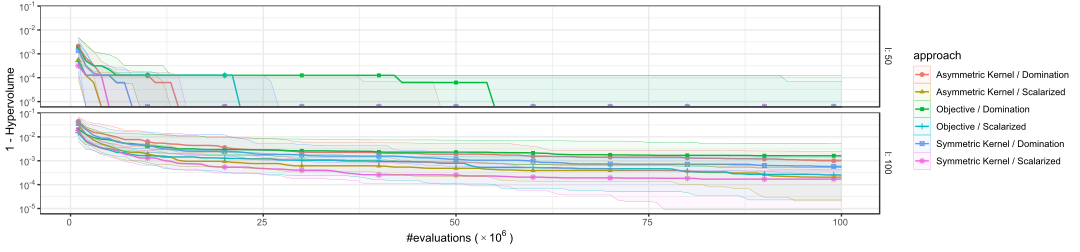

In [11]:
%%R -i problem_name -i data_quantiles_hypervolume_f -w 15 -h 3.5

plt <- ggplot(data_quantiles_hypervolume_f,
              aes(
                  x=`#evaluations bin`,
                  ymin=`Q_0.05(1 - HV)`,
                  y=`Q_0.5(1 - HV)`,
                  ymax=`Q_0.95(1 - HV)`,
                  color=`approach`,
                  fill=`approach`,
                  shape=`approach`)
              ) +
    geom_point(aes(alpha=`show point`)) + scale_alpha_identity(guide="none") +
    geom_line() +
    geom_ribbon(alpha = 0.05, size=0.1) +
    scale_y_log10(
        breaks = trans_breaks("log10", function(x) 10^x),
        labels = trans_format("log10", math_format(10^.x))
    ) +
    scale_x_continuous(
        labels = unit_format(unit = "", scale = 1 / 1e+06, digits = 2)
    ) +
    labs(x =  expression("#evaluations (" %*% 10^6 ~ ")"), y = "1 - Hypervolume") +
    facet_grid(l ~ ., label=label_both) +
    theme_bw() +
    theme(strip.background = element_rect(fill = NA, color=NA))

ggsave(paste(problem_name, "_convergence_multiple_l.pdf", sep=""), device=cairo_pdf)

plt

Go down to $l = 100$, in order to avoid taking up too much space.

In [12]:
data_quantiles_hypervolume_f = data_quantiles_hypervolume[data_quantiles_hypervolume["l"] == 100]

R[write to console]: Saving 7.5 x 3.5 in image



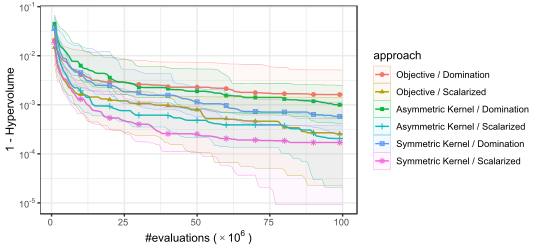

In [14]:
%%R -i preferred_ordering -i problem_name -i data_quantiles_hypervolume_f -w 7.5 -h 3.5
data_quantiles_hypervolume_f$approach = factor(data_quantiles_hypervolume_f$approach, levels=preferred_ordering)

plt <- ggplot(data_quantiles_hypervolume_f,
              aes(
                x=`#evaluations bin`,
                ymin=`Q_0.05(1 - HV)`,
                y=`Q_0.5(1 - HV)`,
                ymax=`Q_0.95(1 - HV)`,
                color=`approach`,
                fill=`approach`,
                shape=`approach`)
) +
geom_point(aes(alpha=`show point`)) + scale_alpha_identity(guide="none") +
geom_line() +
geom_ribbon(alpha = 0.05, size=0.1) +
scale_y_log10(
    breaks = trans_breaks("log10", function(x) 10^x),
labels = trans_format("log10", math_format(10^.x))
) +
scale_x_continuous(
    labels = unit_format(unit = "", scale = 1 / 1e+06, digits = 2)
) +
labs(x =  expression("#evaluations (" %*% 10^6 ~ ")"), y = "1 - Hypervolume") +
# facet_grid(. ~ ., label=label_both) +
theme_bw() +
theme(strip.background = element_rect(fill = NA, color=NA))

ggsave(paste(problem_name, "_convergence_l100.pdf", sep=""), device=cairo_pdf)

plt

# Plotting: Fronts

In [15]:
reference_approach_df = reference_fronts_df.merge(data_last_hypervolume, on="reference path")[["objective0", "objective1"] + [c for c in columns_configuration if c != "approach" ]].drop_duplicates()
reference_approach_df["approach"] = "Reference"
reference_approach_df["run"] = np.nan
reference_approach_df

,objective0,objective1,l,approach,run
0,103.0,124.0,12,Reference,NaN
6,107.0,120.0,12,Reference,NaN
12,110.0,118.0,12,Reference,NaN
18,111.0,117.0,12,Reference,NaN
24,119.0,116.0,12,Reference,NaN
...,...,...,...,...,...
1194,7999.0,7568.0,100,Reference,NaN
1200,8000.0,7563.0,100,Reference,NaN
1206,8003.0,7556.0,100,Reference,NaN
1212,8005.0,7514.0,100,Reference,NaN


In [16]:
approaches_chosen_archives_df = data_last_hypervolume.merge(archives_zip_df, on="archive path")[["objective0", "objective1"] + columns_run]
approaches_chosen_archives_df

,objective0,objective1,approach,l,run
0,103,124,Asymmetric Kernel / Domination,12,0
1,119,116,Asymmetric Kernel / Domination,12,0
2,110,118,Asymmetric Kernel / Domination,12,0
3,107,120,Asymmetric Kernel / Domination,12,0
4,111,117,Asymmetric Kernel / Domination,12,0
...,...,...,...,...,...
1192,7968,7643,Symmetric Kernel / Scalarized,100,6
1193,7970,7639,Symmetric Kernel / Scalarized,100,6
1194,7675,7939,Symmetric Kernel / Scalarized,100,6
1195,7954,7679,Symmetric Kernel / Scalarized,100,6


In [17]:
fronts_df = pd.concat([approaches_chosen_archives_df, reference_approach_df])

In [18]:
fronts_df_f = fronts_df[fronts_df["l"] == 100]

R[write to console]: Saving 7.5 x 3.5 in image



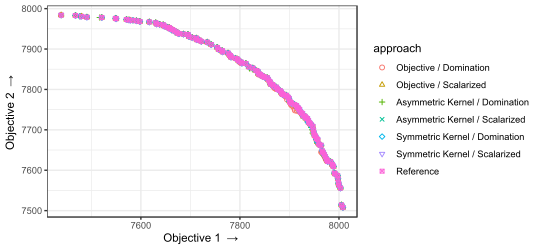

In [19]:
%%R -i preferred_ordering_front -i problem_name -i fronts_df_f -w 7.5 -h 3.5

fronts_df_f$approach = factor(fronts_df_f$approach, levels=preferred_ordering_front)

plt <- ggplot(fronts_df_f,
              aes(
                  x=`objective0`,
                  y=`objective1`,
                  color=`approach`,
                  shape=`approach`),
              fill=NA,
) +
geom_point() +
scale_shape_manual(values=1:length(preferred_ordering_front)) +
labs(x = expression("Objective 1 " %->% ""), y = expression("Objective 2 " %->% "")) +
# facet_grid(. ~ fns, label=label_both) +
theme_bw() +
theme(strip.background = element_rect(fill = NA, color=NA))

ggsave(paste(problem_name, "_final_front_l100.pdf", sep=""), device=cairo_pdf)

plt

# Tabulation

In [10]:
data_quantiles_hypervolume_last = data_quantiles_hypervolume[data_quantiles_hypervolume["#evaluations bin"] == data_quantiles_hypervolume["#evaluations bin"].max()]
data_quantiles_hypervolume_last = data_quantiles_hypervolume_last.drop(errors='ignore', columns=["show point", "#evaluations bin", "Q_0.05(1 - HV)", "Q_0.5(1 - HV)", "Q_0.95(1 - HV)"])
data_quantiles_hypervolume_last

,approach,l,0.05,0.5,0.95
99,Asymmetric Kernel / Domination,12,1.000000,1.000000,1.000000
199,Asymmetric Kernel / Domination,25,1.000000,1.000000,1.000000
299,Asymmetric Kernel / Domination,50,1.000000,1.000000,1.000000
399,Asymmetric Kernel / Domination,100,0.997531,0.999002,0.999585
499,Asymmetric Kernel / Scalarized,12,1.000000,1.000000,1.000000
599,Asymmetric Kernel / Scalarized,25,1.000000,1.000000,1.000000
699,Asymmetric Kernel / Scalarized,50,1.000000,1.000000,1.000000
799,Asymmetric Kernel / Scalarized,100,0.999461,0.999795,0.999979
899,Objective / Domination,12,1.000000,1.000000,1.000000
999,Objective / Domination,25,1.000000,1.000000,1.000000


In [11]:
%%R -i data_quantiles_hypervolume_last
tab <- data_quantiles_hypervolume_last %>%
    # mutate(`hypervolume` = paste(`0.05`, "/", `0.5`, "/",`0.95`)) %>%
    # select(-c(`0.05`, `0.5`, `0.95`)) %>%
    pivot_wider(names_from = approach, values_from=c(`0.05`, `0.5`, `0.95`), names_sep= ".", names_glue = "{approach}_{.value}") %>%
    gt() %>%
    tab_header(title="Hypervolume at end: MaxCut vs MaxCut") %>%
    fmt_integer(starts_with("evaluations")) %>%
    tab_spanner_delim('_')
    # data_color(starts_with("evaluations"), "white") %>%
    # data_color(starts_with("time (ms)"), "ghostwhite")

tab %>% gtsave("2021-12-23-paper_maxcut_maxcut_table_median.tex")
tab

# Statistical Significance

In [10]:
a = 2 * 0.05 # 2 * as tests are correlated and corrected for count: one out of two tests is guaranteed to fail.
final_bin = data_resampled_hypervolume["#evaluations bin"].max()
final_hvs = data_resampled_hypervolume[(data_resampled_hypervolume["l"] == 100) & (data_resampled_hypervolume["#evaluations bin"] == final_bin)]
subsequences = final_hvs.groupby(["approach"])["hypervolume"].apply(list).reset_index()
pd_ordering_type = pd.api.types.CategoricalDtype(categories=preferred_ordering, ordered=True)
subsequences["approach"] = subsequences["approach"].astype(pd_ordering_type)
pairs_df = pd.merge(subsequences, subsequences, how="cross")

from scipy.stats import mannwhitneyu
# Filter out same set of samples
pairs_df = pairs_df[pairs_df["approach_x"] != pairs_df['approach_y']]
def perform_test_on_pair(df):
    return mannwhitneyu(
        np.nan_to_num(df["hypervolume_x"], nan=np.inf),
        np.nan_to_num(df["hypervolume_y"], nan=np.inf),
        use_continuity = False, alternative="greater")

pairs_df[["test statistic", "test p"]] = pairs_df.apply(perform_test_on_pair, axis=1).apply(pd.Series)
# pairs_df.pivot(["fns", "approach_x"], "approach_y", "test p")

# Holm–Bonferroni
def perform_comparison(df):
    df = df.sort_values(["test p"])
    df["H0 accepted"] = (df["test p"] < a / (len(df) - np.arange(0, len(df)))).expanding().min()
    return df

pairs_df = perform_comparison(pairs_df).reset_index(drop = True)
# Bonferroni (does the better correction actually impact the result?)
# pairs_df = pairs_df.sort_values("test p")
# pairs_df["H0 accepted"] = pairs_df["test p"] < a / len(pairs_df)
significant = pairs_df.sort_values(["approach_x", "approach_y"]).pivot(["approach_x"], ["approach_y"], "H0 accepted")
test_p = pairs_df.sort_values(["approach_x", "approach_y"]).pivot(["approach_x"], ["approach_y"], "test p")

def styled(df):
    def get_style(m):
        if m is np.nan:
            return f"background-color: #d3d3d3; color: #000000;"
        if m:
            return f"background-color: #ffffff; color: #000000;"
        else:
            return f"background-color: #808080; color: #ffffff;"
    map_a = significant.applymap(get_style)
    map_a[np.isnan(df)] = f"background-color: #d3d3d3; color: #000000;"

    return map_a

test_p_styled = test_p.style.apply(styled, axis=None).format(na_rep="-", precision=3)
test_p_styled.to_latex("./2021-12-23-paper_maxcut_vs_maxcut_significant.tex", hrules=True, convert_css=True)
test_p_styled


approach_y,Objective / Domination,Objective / Scalarized,Asymmetric Kernel / Domination,Asymmetric Kernel / Scalarized,Symmetric Kernel / Domination,Symmetric Kernel / Scalarized
approach_x,,,,,,
Objective / Domination,-,1.000,0.992,1.000,1.000,1.000
Objective / Scalarized,0.000,-,0.000,0.910,0.004,0.987
Asymmetric Kernel / Domination,0.008,1.000,-,1.000,1.000,1.000
Asymmetric Kernel / Scalarized,0.000,0.090,0.000,-,0.000,0.949
Symmetric Kernel / Domination,0.000,0.996,0.000,1.000,-,1.000
Symmetric Kernel / Scalarized,0.000,0.013,0.000,0.051,0.000,-


In [12]:
sig_counts = significant.stack().rename("sig").reset_index().groupby("approach_x")["sig"].sum().reset_index()
sig_counts["sig"] = sig_counts["sig"].transform(str) + " (" + sig_counts["sig"].rank(ascending=False, method="dense").astype(int).transform(str) + ")"
sig_counts

,approach_x,sig
0,Objective / Domination,0.0 (3)
1,Objective / Scalarized,3.0 (1)
2,Asymmetric Kernel / Domination,0.0 (3)
3,Asymmetric Kernel / Scalarized,3.0 (1)
4,Symmetric Kernel / Domination,2.0 (2)
5,Symmetric Kernel / Scalarized,3.0 (1)


In [24]:
def compute_aoc(df, x, y, x_min, x_max, y_min, y_max, normalize = True):
    # To visualize area-under-the-curve, see the following schematic:
    #         |       first sample
    # y-max - | |---| /        sample in between
    #         | |   ._______ /          last sample
    #         | |           ._________ /
    #         | |    AOC              .___
    # y-min - | |________________________|
    #         L_____________________________
    #           ^ x-min                   ^ x-max

    #           ^---^
    #               ^-------^
    #                       ^---------^
    #                                 ^---^

    dx = pd.concat([pd.Series([x_min]), df[x], pd.Series([x_max])]).diff().shift(-1)
    ys = np.maximum(0.0, pd.concat([pd.Series([y_max]), df[y], pd.Series([y_min])]) - y_min)
    if normalize:
        return ((dx * ys).fillna(0).sum() / ((x_max - x_min) * (y_max - y_min)))
    else:
        return ((dx * ys).fillna(0).sum())

# compute_aoc(pd.DataFrame({ 'x': [0.5], 'y': [0.5]}), "x", "y", 0, 1, 0, 1)
# 0.5 * 1 + 0.5 * 0.5 + ??? * 0 = 0.75

In [22]:
# AOC - Evaluations
a = 2 * 0.05 # 2 * as tests are correlated and corrected for count: one out of two tests is guaranteed to fail.

subs = data_hypervolume[data_hypervolume["l"] == 100].copy()
subs["1 - hypervolume"] = 1 - subs["hypervolume"]

measure = subs.\
    groupby(columns_run).\
    apply(lambda df: compute_aoc(df, "#evaluations", "1 - hypervolume", 0, 100_000_000, 0, 1.0)).\
    rename("aoc").\
    reset_index()

subsequences = measure.groupby(["approach"])["aoc"].apply(list).reset_index()
pd_ordering_type = pd.api.types.CategoricalDtype(categories=preferred_ordering, ordered=True)
subsequences["approach"] = subsequences["approach"].astype(pd_ordering_type)
pairs_df = pd.merge(subsequences, subsequences, how="cross")

from scipy.stats import mannwhitneyu
# Filter out same set of samples
pairs_df = pairs_df[pairs_df["approach_x"] != pairs_df['approach_y']]
def perform_test_on_pair(df):
    return mannwhitneyu(
        np.nan_to_num(df["aoc_x"], nan=np.inf),
        np.nan_to_num(df["aoc_y"], nan=np.inf),
        use_continuity = False, alternative="less")

pairs_df[["test statistic", "test p"]] = pairs_df.apply(perform_test_on_pair, axis=1).apply(pd.Series)
pairs_df.pivot(["approach_x"], "approach_y", "test p")

# Holm–Bonferroni
def perform_comparison(df):
    df = df.sort_values(["test p"])
    df["H0 accepted"] = (df["test p"] < a / (len(df) - np.arange(0, len(df)))).expanding().min()
    return df

pairs_df = perform_comparison(pairs_df).reset_index(drop = True)
# Bonferroni (does the better correction actually impact the result?)
# pairs_df = pairs_df.sort_values("test p")
# pairs_df["H0 accepted"] = pairs_df["test p"] < a / len(pairs_df)
significant = pairs_df.sort_values(["approach_x", "approach_y"]).pivot(["approach_x"], ["approach_y"], "H0 accepted")
test_p = pairs_df.sort_values(["approach_x", "approach_y"]).pivot(["approach_x"], ["approach_y"], "test p")

def styled(df):
    def get_style(m):
        if m is np.nan:
            return f"background-color: #d3d3d3; color: #000000;"
        if m:
            return f"background-color: #ffffff; color: #000000;"
        else:
            return f"background-color: #808080; color: #ffffff;"
    map_a = significant.applymap(get_style)
    map_a[np.isnan(df)] = f"background-color: #d3d3d3; color: #000000;"

    return map_a

test_p_styled = test_p.style.apply(styled, axis=None).format(na_rep="-", precision=3)
test_p_styled.to_latex("./2021-12-23-paper_maxcut_vs_maxcut_oac_evaluations_significant.tex", hrules=True, convert_css=True)
test_p_styled

approach_y,Objective / Domination,Objective / Scalarized,Asymmetric Kernel / Domination,Asymmetric Kernel / Scalarized,Symmetric Kernel / Domination,Symmetric Kernel / Scalarized
approach_x,,,,,,
Objective / Domination,-,1.000,0.006,1.000,0.951,1.000
Objective / Scalarized,0.000,-,0.000,0.002,0.000,0.981
Asymmetric Kernel / Domination,0.994,1.000,-,1.000,1.000,1.000
Asymmetric Kernel / Scalarized,0.000,0.998,0.000,-,0.000,1.000
Symmetric Kernel / Domination,0.049,1.000,0.000,1.000,-,1.000
Symmetric Kernel / Scalarized,0.000,0.019,0.000,0.000,0.000,-


In [21]:
# AOC - time
a = 2 * 0.05 # 2 * as tests are correlated and corrected for count: one out of two tests is guaranteed to fail.

subs = data_hypervolume[data_hypervolume["l"] == 100].copy()
subs["1 - hypervolume"] = 1 - subs["hypervolume"]

time_max = subs["time (ms)"].max()

measure = subs.\
    groupby(columns_run).\
    apply(lambda df: compute_aoc(df, "time (ms)", "1 - hypervolume", 0, time_max, 0, 1.0)).\
    rename("aoc").\
    reset_index()

subsequences = measure.groupby(["approach"])["aoc"].apply(list).reset_index()
pd_ordering_type = pd.api.types.CategoricalDtype(categories=preferred_ordering, ordered=True)
subsequences["approach"] = subsequences["approach"].astype(pd_ordering_type)
pairs_df = pd.merge(subsequences, subsequences, how="cross")

from scipy.stats import mannwhitneyu

# Filter out same set of samples
pairs_df = pairs_df[pairs_df["approach_x"] != pairs_df['approach_y']]


def perform_test_on_pair(df):
    return mannwhitneyu(
        np.nan_to_num(df["aoc_x"], nan=np.inf),
        np.nan_to_num(df["aoc_y"], nan=np.inf),
        use_continuity=False, alternative="less")


pairs_df[["test statistic", "test p"]] = pairs_df.apply(perform_test_on_pair, axis=1).apply(pd.Series)
pairs_df.pivot(["approach_x"], "approach_y", "test p")


# Holm–Bonferroni
def perform_comparison(df):
    df = df.sort_values(["test p"])
    df["H0 accepted"] = (df["test p"] < a / (len(df) - np.arange(0, len(df)))).expanding().min()
    return df


pairs_df = perform_comparison(pairs_df).reset_index(drop=True)
# Bonferroni (does the better correction actually impact the result?)
# pairs_df = pairs_df.sort_values("test p")
# pairs_df["H0 accepted"] = pairs_df["test p"] < a / len(pairs_df)
significant = pairs_df.sort_values(["approach_x", "approach_y"]).pivot(["approach_x"], ["approach_y"],
                                                                              "H0 accepted")
test_p = pairs_df.sort_values(["approach_x", "approach_y"]).pivot(["approach_x"], ["approach_y"],
                                                                         "test p")


def styled(df):
    def get_style(m):
        if m is np.nan:
            return f"background-color: #d3d3d3; color: #000000;"
        if m:
            return f"background-color: #ffffff; color: #000000;"
        else:
            return f"background-color: #808080; color: #ffffff;"

    map_a = significant.applymap(get_style)
    map_a[np.isnan(df)] = f"background-color: #d3d3d3; color: #000000;"

    return map_a


test_p_styled = test_p.style.apply(styled, axis=None).format(na_rep="-", precision=3)
test_p_styled.to_latex("./2021-12-23-paper_maxcut_vs_maxcut_oac_time_significant.tex", hrules=True, convert_css=True)
test_p_styled

approach_y,Objective / Domination,Objective / Scalarized,Asymmetric Kernel / Domination,Asymmetric Kernel / Scalarized,Symmetric Kernel / Domination,Symmetric Kernel / Scalarized
approach_x,,,,,,
Objective / Domination,-,1.000,0.021,1.000,0.887,1.000
Objective / Scalarized,0.000,-,0.000,0.001,0.000,0.121
Asymmetric Kernel / Domination,0.979,1.000,-,1.000,1.000,1.000
Asymmetric Kernel / Scalarized,0.000,0.999,0.000,-,0.000,1.000
Symmetric Kernel / Domination,0.113,1.000,0.000,1.000,-,1.000
Symmetric Kernel / Scalarized,0.000,0.879,0.000,0.000,0.000,-
